In [2]:
import pandas as pd
import re
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
df = pd.read_csv('/Users/ismail/GitHub Projects/Blockchain-Analysis/Completed_Bounties.csv')
df['Platform'] = df['Name'].str.split('-').str[0]
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Year'] = df['Start Date'].dt.year


print(f"TOTAL BOUNTIES {len(df)}")
print(f"\nCOLUMNS {list(df.columns)}")
print("\nTHE DATA TYPES:")
print(df.dtypes)
print("\nMISSING VALUES:")
print(df.isnull().sum())

print("\nBOUNTIES BY LEVEL:")
print(df['Level'].value_counts())
print(df['Level'].value_counts(normalize=True) * 100)

print("\nTHE BOUNTIES BY PLATFORM:")
print(df['Platform'].value_counts().head(5))

print("\nTHE BOUNTIES BY YEAR:")
print(df['Year'].value_counts().sort_index())

TOTAL BOUNTIES 384

COLUMNS ['Name', 'Bounty Title', 'Description', 'Level', 'Start Date', 'End Date', 'Submission Status', 'Batch', 'Platform', 'Year']

THE DATA TYPES:
Name                         object
Bounty Title                 object
Description                  object
Level                        object
Start Date           datetime64[ns]
End Date                     object
Submission Status            object
Batch                        object
Platform                     object
Year                        float64
dtype: object

MISSING VALUES:
Name                   0
Bounty Title           0
Description            0
Level                  0
Start Date            39
End Date               0
Submission Status      0
Batch                131
Platform               0
Year                  39
dtype: int64

BOUNTIES BY LEVEL:
Level
Intermediate    175
Beginner        139
Advanced         70
Name: count, dtype: int64
Level
Intermediate    45.572917
Beginner        36.197917
Advanc

In [4]:
all_text = df['Bounty Title'] + ' ' + df['Description'].str.lower()

skills = {
    'SQL': r'\bsql\b',
    'Python': r'\bpython\b',
    'Visualization': r'\bvisualiz|chart|graph|plot\b',
    'Dune': r'\bdune\b',
    'Flipside': r'\bflipside\b',
    'Data Analysis': r'\banalyz|analysis\b',
    'Research': r'\bresearch\b',
    'Smart Contract': r'\bsmart contract|contract\b',
    'Subgraph': r'\bsubgraph\b',
    'Dashboard': r'\bdashboard\b',
    'Machine Learning': r'\bmachine learning\b|ml\b',
    'Statistics': r'\bstatistic|statistical\b',
}

topics = {
    'DeFi': r'\bdefi\b',
    'NFT': r'\bnft\b',
    'DEX': r'\bdex\b',
    'Lending': r'\blend|lending\b',
    'Staking': r'\bstake|staking\b',
    'Liquidity': r'\bliquidity\b',
    'TVL': r'\btvl\b|total value locked',
    'Swap': r'\bswap\b',
    'Bridge': r'\bbridge\b',
    'Gaming': r'\bgaming|game\b',
    'Layer 2': r'\blayer 2\b|l2\b',
    'DAO': r'\bdao\b',
    'Governance': r'\bgovernance\b',
    'Yield': r'\byield\b',
    'AMM': r'\bamm\b|automated market maker',
}

protocols = {
    'Uniswap': r'\buniswap\b',
    'Aave': r'\baave\b',
    'Curve': r'\bcurve\b',
    'Compound': r'\bcompound\b',
    'MakerDAO': r'\bmakerdao|maker\b',
    'Olympus': r'\bolympus\b',
    'Sushiswap': r'\bsushiswap|sushi\b',
    'Pancakeswap': r'\bpancake\b',
}

chains = {
    'Ethereum': r'\bethereum\b|\beth\b',
    'Solana': r'\bsolana\b|\bsol\b',
    'Polygon': r'\bpolygon\b',
    'Avalanche': r'\bavalanche\b|\bavax\b',
    'Arbitrum': r'\barbitrum\b',
    'Optimism': r'\boptimism\b',
    'BSC': r'\bbsc\b|binance smart chain|binance',
    'NEAR': r'\bnear\b',
    'Terra': r'\bterra\b',
    'Osmosis': r'\bosmosis\b',
    'Cosmos': r'\bcosmos\b',
}

metrics = {
    'TVL': r'\btvl\b|total value locked',
    'Volume': r'\bvolume\b',
    'Users': r'\buser|address\b',
    'Transactions': r'\btransaction|tx\b',
    'Fees': r'\bfees?\b',
    'APY/APR': r'\bapy\b|\bapr\b',
    'Market Share': r'\bmarket share\b',
    'Growth': r'\bgrowth\b',
}



In [5]:
skill_counts = {}
for skill, pattern in skills.items():
    count = all_text.str.contains(pattern, case=False, regex=True).sum()
    skill_counts[skill] = count
skill_counts = dict(sorted(skill_counts.items(), key=lambda x: x[1], reverse=True))
print("HOT SKILLS & TOPICS MENTIONED IN BOUNTIES")
for skill, count in skill_counts.items():
    pct = (count/len(df)*100)
    print(f"{skill:20} {count:4} ({pct:5.1f}%)")

topic_counts = {}
for topic, pattern in topics.items():
    count = all_text.str.contains(pattern, case=False, regex=True).sum()
    topic_counts[topic] = count
topic_counts = dict(sorted(topic_counts.items(), key=lambda x: x[1], reverse=True))

for topic, count in topic_counts.items():
    pct = (count/len(df)*100)
    print(f"{topic:20} {count:4} ({pct:5.1f}%)")


protocol_counts = {}
for protocol, pattern in protocols.items():
    count = all_text.str.contains(pattern, case=False, regex=True).sum()
    protocol_counts[protocol] = count
protocol_counts = dict(sorted(protocol_counts.items(), key=lambda x: x[1], reverse=True))
print("HOT PROTOCOLS MENTIONED IN BOUNTIES")
for protocol, count in protocol_counts.items():
    pct = (count/len(df)*100)
    print(f"{protocol:20} {count:4} ({pct:5.1f}%)")
    
chain_counts = {}
for chain, pattern in chains.items():
    count = all_text.str.contains(pattern, case=False, regex=True).sum()
    chain_counts[chain] = count
chain_counts = dict(sorted(chain_counts.items(), key=lambda x: x[1], reverse=True))
print("MOST CHAIN MENTIONED IN BOUNTIES")
for chain, count in chain_counts.items():
    pct = (count/len(df)*100)
    print(f"{chain:20} {count:4} ({pct:5.1f}%)")

metric_counts = {}
for metric, pattern in metrics.items():
    count = all_text.str.contains(pattern, case=False, regex=True).sum()
    metric_counts[metric] = count
metric_counts = dict(sorted(metric_counts.items(), key=lambda x: x[1], reverse=True))
print("MOST METRIC MENTIONED IN BOUNTIES")
for metric, count in metric_counts.items():
    pct = (count/len(df)*100)
    print(f"{metric:20} {count:4} ({pct:5.1f}%)")

HOT SKILLS & TOPICS MENTIONED IN BOUNTIES
Dashboard             139 ( 36.2%)
Visualization         112 ( 29.2%)
Data Analysis          89 ( 23.2%)
Statistics             51 ( 13.3%)
Flipside               47 ( 12.2%)
Research               36 (  9.4%)
Smart Contract         14 (  3.6%)
Dune                   13 (  3.4%)
Subgraph               10 (  2.6%)
Machine Learning        3 (  0.8%)
SQL                     1 (  0.3%)
Python                  0 (  0.0%)
Liquidity              41 ( 10.7%)
Staking                36 (  9.4%)
NFT                    28 (  7.3%)
DAO                    24 (  6.2%)
DEX                    22 (  5.7%)
DeFi                   19 (  4.9%)
Bridge                 17 (  4.4%)
Governance             17 (  4.4%)
Swap                   15 (  3.9%)
Lending                14 (  3.6%)
TVL                    12 (  3.1%)
Yield                  11 (  2.9%)
Layer 2                 6 (  1.6%)
AMM                     5 (  1.3%)
Gaming                  3 (  0.8%)
HOT PROTOCOLS

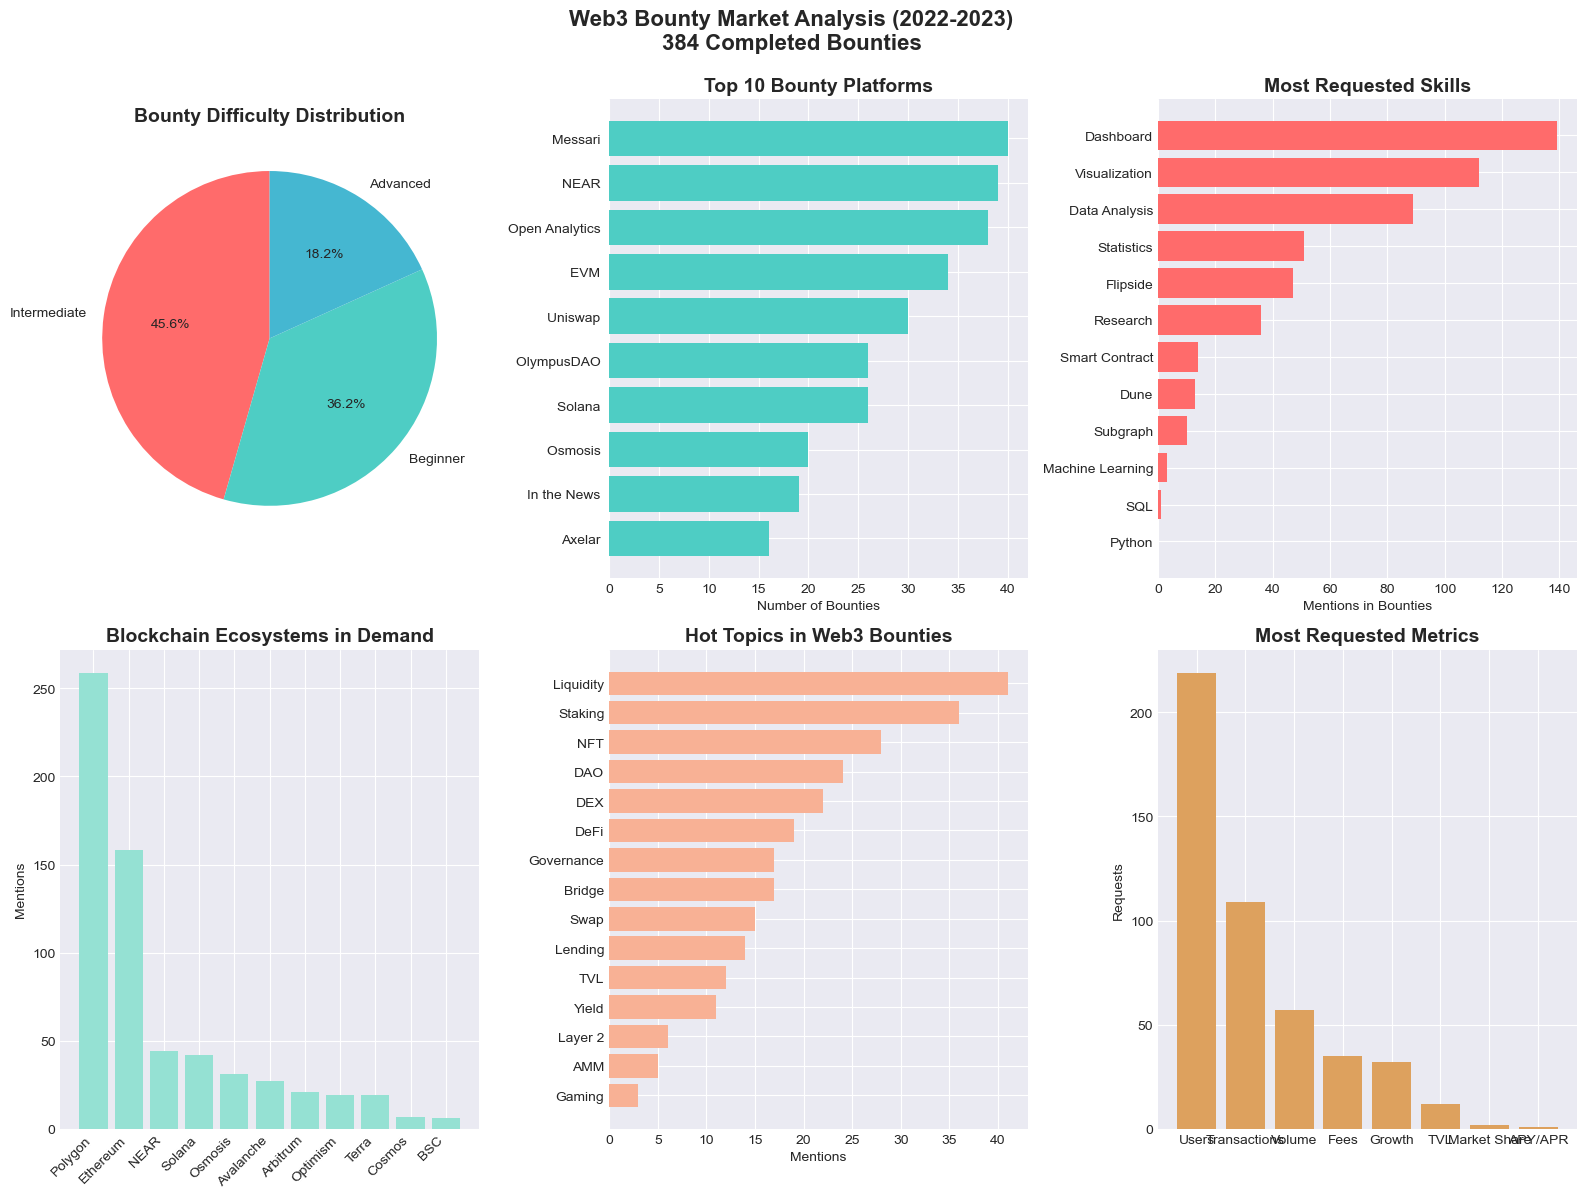

In [6]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
fig = plt.figure(figsize=(16, 12))


ax1 = plt.subplot(2, 3, 1)
difficulty_counts = df['Level'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
ax1.pie(difficulty_counts, labels=difficulty_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax1.set_title('Bounty Difficulty Distribution', fontsize=14, fontweight='bold')

ax2 = plt.subplot(2, 3, 2)
top_platforms = df['Platform'].value_counts().head(10)
ax2.barh(range(len(top_platforms)), top_platforms.values, color='#4ECDC4')
ax2.set_yticks(range(len(top_platforms)))
ax2.set_yticklabels(top_platforms.index)
ax2.set_xlabel('Number of Bounties')
ax2.set_title('Top 10 Bounty Platforms', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

ax3 = plt.subplot(2, 3, 3)
skills_df = pd.DataFrame(list(skill_counts.items()), columns=['Skill', 'Count'])
skills_df = skills_df.sort_values('Count', ascending=True)
ax3.barh(skills_df['Skill'], skills_df['Count'], color='#FF6B6B')
ax3.set_xlabel('Mentions in Bounties')
ax3.set_title('Most Requested Skills', fontsize=14, fontweight='bold')

ax4 = plt.subplot(2, 3, 4)
chains_df = pd.DataFrame(list(chain_counts.items()), columns=['Chain', 'Count'])
chains_df = chains_df.sort_values('Count', ascending=False)
ax4.bar(range(len(chains_df)), chains_df['Count'], color='#95E1D3')
ax4.set_xticks(range(len(chains_df)))
ax4.set_xticklabels(chains_df['Chain'], rotation=45, ha='right')
ax4.set_ylabel('Mentions')
ax4.set_title('Blockchain Ecosystems in Demand', fontsize=14, fontweight='bold')


ax5 = plt.subplot(2, 3, 5)
topics_df = pd.DataFrame(list(topic_counts.items()), columns=['Topic', 'Count'])
topics_df = topics_df.sort_values('Count', ascending=True)
ax5.barh(topics_df['Topic'], topics_df['Count'], color='#F8B195')
ax5.set_xlabel('Mentions')
ax5.set_title('Hot Topics in Web3 Bounties', fontsize=14, fontweight='bold')

ax6 = plt.subplot(2, 3, 6)
metrics_df = pd.DataFrame(list(metric_counts.items()), columns=['Metric', 'Count'])
metrics_df = metrics_df.sort_values('Count', ascending=False)
ax6.bar(range(len(metrics_df)), metrics_df['Count'], color='#DDA15E')
ax6.set_xticks(range(len(metrics_df)))
ax6.set_xticklabels(metrics_df['Metric'], rotation=0)
ax6.set_ylabel('Requests')
ax6.set_title('Most Requested Metrics', fontsize=14, fontweight='bold')

plt.suptitle('Web3 Bounty Market Analysis (2022-2023)\n384 Completed Bounties', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()